In [2]:
import pandas as pd
df = pd.read_csv('regression_w_l_c_with_weight.csv')

In [4]:
# Keep only 'Throttle' and 'RPM' columns
df = df[['Throttle', 'RPM']]


In [5]:
df

,Throttle,RPM
0,46.101190,9531.494048
1,47.080838,9394.374251
2,48.086310,9429.505952
3,47.723404,9437.838906
4,46.830303,9427.572727
...,...,...
8306,50.872340,9382.875887
8307,43.853035,8971.025559
8308,52.931408,9461.837545
8309,47.568421,9103.670175


In [6]:
# Drop any rows with missing Throttle or RPM
df = df.dropna(subset=['Throttle', 'RPM'])


In [7]:
df

,Throttle,RPM
0,46.101190,9531.494048
1,47.080838,9394.374251
2,48.086310,9429.505952
3,47.723404,9437.838906
4,46.830303,9427.572727
...,...,...
8306,50.872340,9382.875887
8307,43.853035,8971.025559
8308,52.931408,9461.837545
8309,47.568421,9103.670175


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Define X (Throttle) and y (RPM)
X = df['Throttle'].values.reshape(-1, 1)  # Reshape needed because sklearn expects 2D input
y = df['RPM'].values

# Step 2: Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: (Optional) Print the model parameters
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient (Throttle → RPM): {model.coef_[0]:.2f}")


Intercept: 6603.13
Coefficient (Throttle → RPM): 56.95


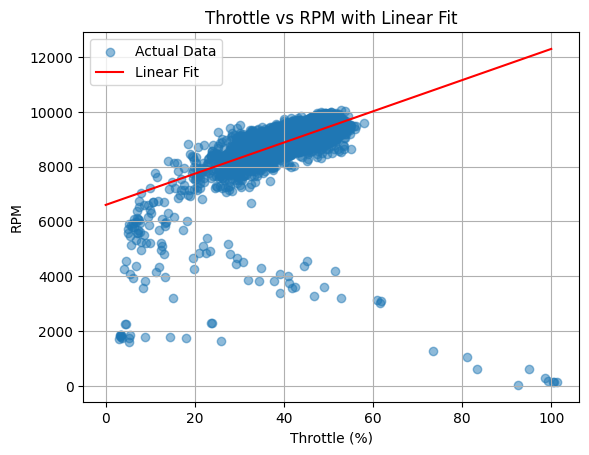

In [9]:
import matplotlib.pyplot as plt

# Scatter plot of real data
plt.scatter(X, y, alpha=0.5, label="Actual Data")

# Regression line
throttle_range = np.linspace(0, 100, 100).reshape(-1, 1)
rpm_predicted = model.predict(throttle_range)
plt.plot(throttle_range, rpm_predicted, color='red', label="Linear Fit")

plt.xlabel('Throttle (%)')
plt.ylabel('RPM')
plt.title('Throttle vs RPM with Linear Fit')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Step 1: Predict on the training data
y_pred = model.predict(X)

# Step 2: Calculate evaluation metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

# Step 3: Print them
print(f"R² Score (Explained Variance): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


R² Score (Explained Variance): 0.2992
Mean Squared Error (MSE): 397109.85
Mean Absolute Error (MAE): 256.75


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Step 1: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Expands features to [1, Throttle, Throttle^2]

# Step 2: Fit a linear regression on these polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Step 3: (Optional) Print model coefficients
print(f"Intercept: {poly_model.intercept_:.2f}")
print(f"Coefficients: {poly_model.coef_}")


Intercept: 2498.66
Coefficients: [  0.         284.56143082  -2.97284743]


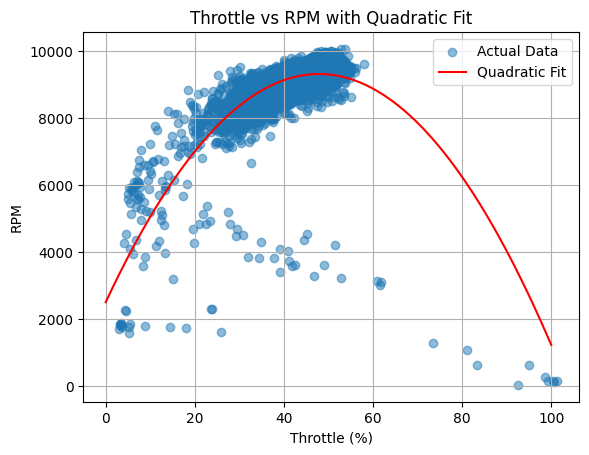

In [12]:
# Scatter plot of real data
plt.scatter(X, y, alpha=0.5, label="Actual Data")

# Regression curve
throttle_range = np.linspace(0, 100, 500).reshape(-1, 1)
throttle_range_poly = poly.transform(throttle_range)
rpm_predicted = poly_model.predict(throttle_range_poly)

plt.plot(throttle_range, rpm_predicted, color='red', label="Quadratic Fit")
plt.xlabel('Throttle (%)')
plt.ylabel('RPM')
plt.title('Throttle vs RPM with Quadratic Fit')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Step 1: Predict RPM on training data using the quadratic model
y_poly_pred = poly_model.predict(X_poly)

# Step 2: Calculate evaluation metrics
r2 = r2_score(y, y_poly_pred)
mse = mean_squared_error(y, y_poly_pred)
mae = mean_absolute_error(y, y_poly_pred)

# Step 3: Print them
print(f"Quadratic R² Score (Explained Variance): {r2:.4f}")
print(f"Quadratic Mean Squared Error (MSE): {mse:.2f}")
print(f"Quadratic Mean Absolute Error (MAE): {mae:.2f}")


Quadratic R² Score (Explained Variance): 0.6385
Quadratic Mean Squared Error (MSE): 204852.10
Quadratic Mean Absolute Error (MAE): 237.95


In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results
r2_scores = []
mse_scores = []
mae_scores = []

for train_index, test_index in kf.split(X):
    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Transform with polynomial features
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Fit model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict
    y_pred = model.predict(X_test_poly)

    # Evaluate
    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))

# Print average metrics
print(f"Cross-validated Quadratic R²: {np.mean(r2_scores):.4f} ± {np.std(r2_scores):.4f}")
print(f"Cross-validated MSE: {np.mean(mse_scores):.2f} ± {np.std(mse_scores):.2f}")
print(f"Cross-validated MAE: {np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}")


Cross-validated Quadratic R²: 0.6307 ± 0.0469
Cross-validated MSE: 205973.10 ± 19386.48
Cross-validated MAE: 238.11 ± 2.14


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Step 1: Initialize Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Let trees grow until leaves are pure
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all cores
)

# Step 2: Cross-validate
r2_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Step 3: Print results
print(f"Random Forest Cross-validated R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")


Random Forest Cross-validated R²: 0.5041 ± 0.1471
